# STAT303-2: Assignment 1

In [1]:
# Importing required packages and data
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

consumption = pd.read_csv('petrol_consumption_train.csv')
test = pd.read_csv('petrol_consumption_test.csv')
prostate = pd.read_csv('prostate.csv')

## Part 1 
Read the dataset petrol_consumption_train.csv. It contains the following five columns:

Petrol_tax: Petrol tax (cents per gallon)

Per_capita_income: Average income (dollars)

Paved_highways: Paved Highways (miles)

Prop_license: Proportion of population with driver's licenses

Petrol_consumption: Consumption of petrol (millions of gallons)

(20 points - max 25 possible)

a.	Make a pairwise plot of all the variables in the dataset. Which variable seems to have the highest linear correlation with petrol_consumption? Let this variable be predictor P. (3 points for visualization, 1 point for answer) 

Note: If you cannot figure out P by looking at the visualization, you may find the pairwise correlation coefficient to identify P.

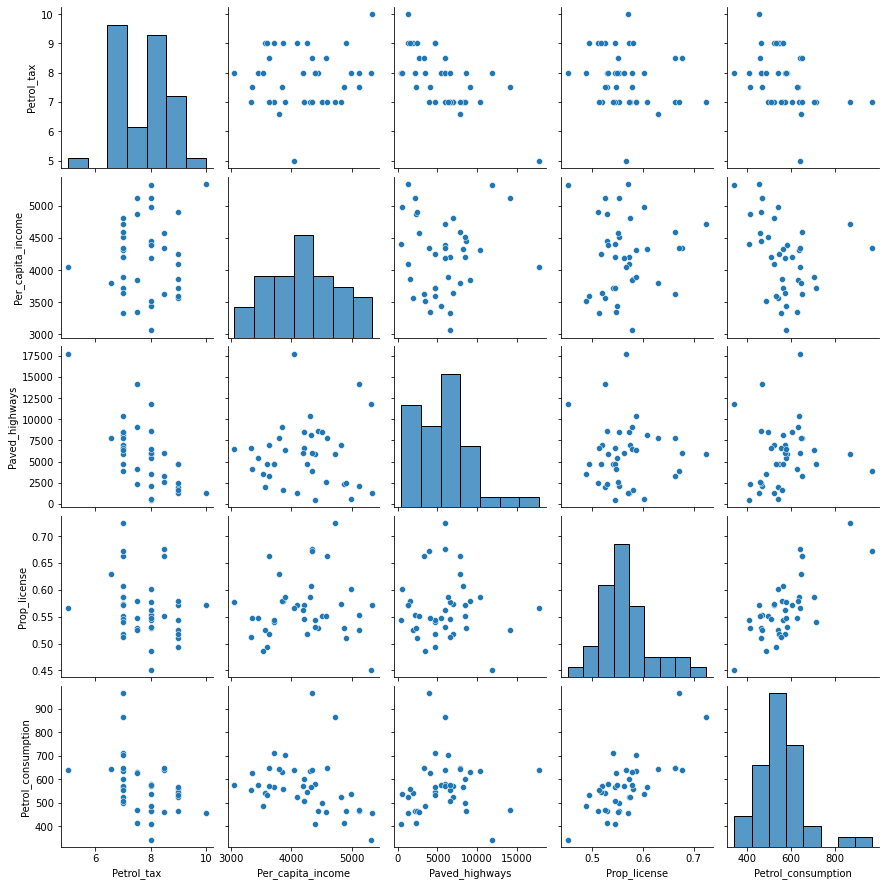

In [2]:
#Creating pairwise plot
sns.pairplot(consumption)

**According to my pairwise plot above, predictor P is the variable Prop_license**.

b.Fit a simple linear regression model to predict petrol_consumption based on predictor P (identified in the previous part). Print the model summary. (2 points for code)

In [3]:
 #OLS Function
 ols_object = smf.ols(formula = 'Petrol_consumption~Prop_license', data = consumption)

#Fit to model
model = ols_object.fit()

#Printing the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Petrol_consumption   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     40.51
Date:                Wed, 19 Jan 2022   Prob (F-statistic):           1.80e-07
Time:                        00:19:12   Log-Likelihood:                -231.59
No. Observations:                  40   AIC:                             467.2
Df Residuals:                      38   BIC:                             470.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -267.6155    132.038     -2.027      0.050    -534.912      -0.319
Prop_license  1479.1803    232.414      6.364      0.000    1008.682    1949.678
==============================================================================
Omnibus:                        5.963   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                4.620
Skew:                           0.762   Prob(JB):                       0.0993
Kurtosis:                       3.670   Cond. No.                         23.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

c.	What is the increase in petrol consumption for an increase of 0.01 in P? (1 point for answer)

In [4]:
0.01 * 1479.1803

14.791803

**For increase of 0.01 in P or the Petrol_license variable, thare is an increase of 14.79 millions of gallons in the petrol consumption.**

d.	Does petrol consumption have a statistically significant relationship with the predictor P? (1 point for answer)

**Yes, since the p-value found in the model is less than 0.05, there is a significantly statistical relationship between prop_license and petrol_consumption.**

e.	What is the R-squared? Interpret its value. (1 point for answer, 1 point for interpretation)

**The R-squared is 0.516, meaning that 51.6% of variance in the y-variable, the petrol consumption, is explained by the x-variable, the Prop_license variable.**

f.	Estimate the petrol consumption for a state in which 50% of the population has a driver’s license. What are the confidence and prediction intervals for your estimate? (2 points for code, 1.5 points for answer)

In [5]:
model.get_prediction(pd.DataFrame({'Prop_license': [0.50]})).summary_frame(alpha = 0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,471.974627,19.896237,431.6968,512.252454,302.822725,641.126528


**I estimate that the petrol consumption for a state in which 50% of the population has a driver's license is 471.97 million gallons, with a confidence interval of [431.6968, 512.252454] and [302.822725, 641.126528].**

g.	Estimate the petrol consumption for a state in which 10% of the population has a driver’s license. Are you getting a reasonable estimate? Why or why not? (2 points for code, 1.5 points for answer) 

In [6]:
model.get_prediction(pd.DataFrame({'Prop_license': [0.10]})).summary_frame(alpha = 0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-119.697506,108.929769,-340.214295,100.819283,-394.684264,155.289251


**I estimate that the petrol consumption for a state in which 10% of the population has a driver's license is -119.7 million gallons. This prediction does not seem like a reasonable estimate because unless the state is producing a surplus of 100+ millions of gallons of petrol, why would the consumption of petrol be a negative number.**

h.	Estimate the petrol consumption for the observations in petrol_consumption_test.csv. Find the RMSE. (2 points for code, 1 point for answer)

In [7]:
#Estimate petrol consumption for observations in consumption df
pred_test = model.predict(test)

In [8]:
#Estimate the RSME
np.sqrt(((test.Petrol_consumption - pred_test)**2).mean())

80.139039411524

**The RMSE is 80.139 for petrol consumption.**

### Bonus point questions: (5 points with no partial credit, will only give credit if all parts are answered correctly)

i.	Fit a simple linear regression model to predict petrol_consumption based on predictor P, but without an intercept term.

In [9]:
 #OLS Function
 ols_object = sm.OLS(consumption['Petrol_consumption'], consumption['Prop_license'])

#Fit to model
model = ols_object.fit()

#Printing the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Petrol_consumption   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              1853.
Date:                Wed, 19 Jan 2022   Prob (F-statistic):                    1.71e-34
Time:                        00:19:12   Log-Likelihood:                         -233.64
No. Observations:                  40   AIC:                                      469.3
Df Residuals:                      39   BIC:                                      471.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Prop_license  1010.3504     23.469     43.051      0.000     962.880    1057.821
==============================================================================
Omnibus:                       13.327   Durbin-Watson:                   0.991
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.181
Skew:                           1.081   Prob(JB):                     0.000505
Kurtosis:                       5.105   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

j.	Estimate the petrol consumption for the observations in petrol_consumption_test.csv using the model in developed in (i). Find the RMSE

In [10]:
#Estimate the petrol consumption
pred_test = model.predict(test['Prop_license'])

In [11]:
#Estimate the RSME
np.sqrt(((test['Petrol_consumption'] - pred_test)**2).mean())

76.39874449255201

**The RMSE is 76.39.**

k.	The RMSE for the models in (i) and (b) are similar, which indicates that both models are almost equally good. However, the R-squared for the model in (j) is much higher than the R-squared for the model in (b). Why?

**While the RMSE for the two different models are similar, the difference is accounted by the fact that the one model does not include a constant, which does a variety of things. Firstly, it forces y to the origin when x = 0. Additiionally, since there is no constant, it causes the denominator to be larger, causing the whole fraction to result in a smaller number. When this smaller number than usual is subtracted from 1, more of the remains after the calculations, resulting in a larger resulting RMSE.**


## Part 2

A study was conducted on 97 men with prostate cancer who were due to receive a radical prostatectomy. The dataset prostate.csv contains data on 9 measurements made on these 97 men. The description of variables can be found here: https://rafalab.github.io/pages/649/prostate.html

(17 points total) 

a.	Fit a linear regression model with lpsa as the response and the other variables as the predictors. Write down the equation to predict lpsa based on the other eight variables. (2 points for code, 1 point for answer) 

In [12]:
#OLS Function
ols_object = smf.ols(formula = 'lpsa ~ lcavol + lweight + age + lbph + svi + lcp + gleason + pgg45', data = prostate)

#Fit to model
model = ols_object.fit()

#Printing the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lpsa   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     20.86
Date:                Wed, 19 Jan 2022   Prob (F-statistic):           2.24e-17
Time:                        00:19:12   Log-Likelihood:                -99.476
No. Observations:                  97   AIC:                             217.0
Df Residuals:                      88   BIC:                             240.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6693      1.296      0.516      0.607      -1.907       3.246
lcavol         0.5870      0.088      6.677      0.000       0.412       0.762
lweight        0.4545      0.170      2.673      0.009       0.117       0.792
age           -0.0196      0.011     -1.758      0.082      -0.042       0.003
lbph           0.1071      0.058      1.832      0.070      -0.009       0.223
svi            0.7662      0.244      3.136      0.002       0.281       1.252
lcp           -0.1055      0.091     -1.159      0.250      -0.286       0.075
gleason        0.0451      0.157      0.287      0.775      -0.268       0.358
pgg45          0.0045      0.004      1.024      0.309      -0.004       0.013
==============================================================================
Omnibus:                        0.235   Durbin-Watson:                   1.507
Prob(Omnibus):                  0.889   Jarque-Bera (JB):                0.026
Skew:                          -0.017   Prob(JB):                        0.987
Kurtosis:                       3.073   Cond. No.                     1.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**The model equation is:  
lpsa = 0.6693 + 0.5870 (lcavol) + 0.4545 (lweight) - 0.0196 (age) + 0.1071 (lbph) + 0.7662 (svi) - 0.1055 (lcp) + 0.0451 (gleason) + 0.0045 (pgg45)**

b. Is the relationship between lpsa and the predictor variables significant at 0.05? (1 point for answer)

**Yes, the relationship between Ipsa and the predictor variables is significant at an alpha of 0.05 because the p-value corresponding to the f-statistic is less than 0.05.**

c.	Report the p-value for age. What do you conclude about the significance of this variable? (1 point for answer, 1 point for conclusion) 

**The p-value for age is 0.082. Because 0.082 is larger than 0.05 (at a significance level of 0.05), this means that age does not have a significant impact on lpsa.**

d.	What is the 95% confidence interval for the coefficient of age? Can you conclude anything about its significance based on the confidence interval? (1 point for answer, 1 point for conclusion) 

**The 95% confidence interval for the coefficient of age is [-0.042, 0.003]. Because the confidence interval centers around 0, it appears as if, though it fluctuates between positive and negative, age may not have a significant impact on Ipsa.**

e.	Fit a simple linear regression on lpsa against age. What is the p-value for age? (2 points for code, 1 point for answer) 

In [13]:
#OLS Function
ols_object = smf.ols(formula = 'lpsa ~ age', data = prostate)

#Fit to model
model = ols_object.fit()

#Printing the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lpsa   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     2.813
Date:                Wed, 19 Jan 2022   Prob (F-statistic):             0.0968
Time:                        00:19:13   Log-Likelihood:                -149.64
No. Observations:                  97   AIC:                             303.3
Df Residuals:                      95   BIC:                             308.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7991      1.008      0.793      0.430      -1.202       2.800
age            0.0263      0.016      1.677      0.097      -0.005       0.057
==============================================================================
Omnibus:                        2.538   Durbin-Watson:                   0.067
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                2.096
Skew:                           0.152   Prob(JB):                        0.351
Kurtosis:                       3.653   Cond. No.                         558.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**In this model, the p-value for age is 0.097.**

f.	Explain why this p-value in (e) is different from the p-value in (b). (3 points for answer)

**The p-values may be different because of the number of variables that are taken into account in the model. Since in part (b), we incorporated the affects of 8 different variables on Ipsa, there perhaps is an increased level of precision compared to the model that takes into account only age as a predictor of lpsa.**

g.	Predict lpsa of a 65-year old man with lcavol = 1.35, lweight = 3.65, lbph = 0.1, svi = 0.22, lcp = -0.18, gleason = 6.75, and pgg45 = 25 and find 95% prediction intervals. (2 points for code,  1 points for answer) 

In [14]:
0.6693 + 0.5870 * 1.35 + 0.4545 * 3.65 - 0.0196 * 65 + 	0.1071 * 0.1 + 0.7662 * 0.22 - 0.1055 * (-0.18) + 0.0451 * 6.75 + 0.0045 * 25

2.461864

**I predict that the lpsa of the 65-year old man is 2.461864.**